In [2]:
import numpy as np
import pandas as pd
import os

In [5]:
from konlpy.tag import Okt
okt = Okt()

In [7]:
# csv파일 합치기
df1 = pd.read_csv("네이버 쇼핑/Apple(shopping).csv",index_col=0)  
df1.head()

,type,category,review,star
0,아이패드,별점,고장나서 옴 수리하기도 돈아까윰,1
1,아이패드,별점,그냥 모든게 허접해요,1
2,아이패드,별점,NaN,1
3,아이패드,별점,대응이 정말 안좋아요,1
4,아이패드,별점,액정 불량화소 있어서 말하니 센터가서 처리하라고하네 편하게 받고 싶은데 다시 가서 ...,1


In [14]:
df1.dropna()

,type,category,review,star
0,아이패드,별점,고장나서 옴 수리하기도 돈아까윰,1
1,아이패드,별점,그냥 모든게 허접해요,1
3,아이패드,별점,대응이 정말 안좋아요,1
4,아이패드,별점,액정 불량화소 있어서 말하니 센터가서 처리하라고하네 편하게 받고 싶은데 다시 가서 ...,1
5,아이패드,별점,일주일이 넘도록 환불처리가 되지 않아 빠른 답변 부탁드립니다,1
...,...,...,...,...
2414,애플 에어팟 프로,별점,왼쪽이 년 좀 넘게 쓰던 프로팟인데 자주 떨어트리고 물티슈로 자주닦아서 그런가 오른...,5
2415,애플 에어팟 프로,별점,년 월 제품이 왔습니다후기로 보아 제가 제일 오래된 상품인 듯하네요다른 분들은 다들...,5
2416,애플 에어팟 프로,별점,한달 넘게 사용중인 갤럭시 유저입니다 사용하는 내내 연결 끊김이나 문제 없었고 기능...,5
2417,애플 에어팟 프로,별점,너무너무 만족해요 기존에 에어팟무선 쓰고 있었는데 한쪽을 잃어버려서 고민하다가 프로...,5


In [15]:
review = df1["review"] # X_data
star = df1["star"] # y_data

In [16]:
from sklearn.model_selection import train_test_split

train_x, test_x, train_y, test_y = train_test_split(review, star, test_size=0.2, random_state=0)

In [17]:
len(train_x), len(train_y)

(1935, 1935)

In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer

# data 토큰화 작업

tfv = TfidfVectorizer(tokenizer=okt.morphs, ngram_range=(1,2), min_df=3, max_df=0.9)
tfv.fit(train_x)
tfv_train_x = tfv.transform(train_x)
tfv_test_x = tfv.transform(test_x)

C:\Users\shk97\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:484: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"


ValueError: np.nan is an invalid document, expected byte or unicode string.

In [ ]:
from xgboost import XGBClassifier

In [11]:
# 모델 설정
xgbc = XGBClassifier(n_estimators=400, learning_rate=0.01, max_depth=10)
xgbc.fit(tfv_train_x, train_y)

#preds = xgbc.predict(X_test)
#pred_proba = xgbc.predict_proba(X_test)
#pred_proba
print(xgbc.score(tfv_train_x, train_y))
print(xgbc.score(tfv_test_x, test_y))

C:\Users\not14\anaconda3\envs\tf1\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:26:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0.8941618911174785
0.5947010383100608


In [12]:
from sklearn.metrics import classification_report

In [13]:
# 모델 성능 평가
# x_data -> 네이버 쇼핑 리뷰, y_data -> 별점 (1,2,3,4,5)

print(classification_report(test_y, xgbc.predict(tfv_test_x)))

              precision    recall  f1-score   support

           1       0.53      0.42      0.47       147
           2       0.45      0.09      0.16        96
           3       0.51      0.23      0.31       455
           4       0.45      0.51      0.48       813
           5       0.70      0.84      0.76      1282

    accuracy                           0.59      2793
   macro avg       0.53      0.42      0.44      2793
weighted avg       0.58      0.59      0.57      2793



[[  62    5    9   39   32]
 [  24    9    7   39   17]
 [  19    4  103  256   73]
 [   5    1   63  416  328]
 [   7    1   21  182 1071]]


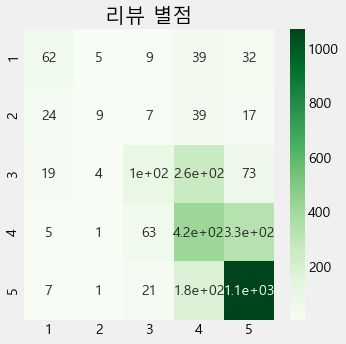

In [40]:
# confusion matrix

from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
font_name = fm.FontProperties(fname="C:/Windows/Fonts/malgun.ttf").get_name()
plt.rc("font", family=font_name)
import matplotlib as mlp
mlp.rcParams["axes.unicode_minus"] = False
import seaborn as sns
plt.style.use("fivethirtyeight")
import warnings
warnings.filterwarnings("ignore")

LABELS = ['1','2','3','4','5']
mat = confusion_matrix(test_y, xgbc.predict(tfv_test_x))

plt.rcParams["figure.figsize"] = (5,5)
plt.title("리뷰 별점")
sns.heatmap(mat,
            xticklabels=LABELS, yticklabels=LABELS,
            annot = True, #실제 값 화면에 나타내기
            cmap = 'Greens' #색상
            )
print(mat)

In [41]:
# 예시
test_x.iloc[34:45]

295                             배송도 빠르고 어린이나 유아용으로 딱 좋네요~
953     가장저렴해서 하이마트에서 샀어요40mm와 44mm중에 고민했는데여자가차이엔 40mm...
479                                          배송도 빠르고 좋으네요
950     월요일에 배송이 온 것까진 좋았는데 제품 박스 모서리 부분이 어디에 찍힌건지 구겨져...
530                                      구매후 배송 1주일 걸렸읍니다
316     정말좋습니다 장점 필기감 최상, 화면 사이즈 노트북수준 속도빠르구요오피스는 노트북보...
1172    제품과 따로 보낸데다 오래 기다려서 받은 제품이원래 주기로 한 사은품도 아니고가격 ...
799                             스벅 쿠폰이 없습니다 박스에 들어있지 않습니다
136     됐으면 좋겠다 너무좋겠다 됏으면 좋겠다 삼전은 승리한다. 제발 저주세요 저저저저저좀...
277     저가형 구형 노트북을 어렵게 어렵게 생명 연장을하며 사용하고 있는 중 ㅠㅠ 갤럭시 ...
480     통화할때 상대방한테 주변소리가 너무크게 들려요센터가서 결국 양쪽 다 교체했어요노캔도...
Name: review, dtype: object

In [42]:
a = test_x.iloc[34:45]
my_review = tfv.transform(a)
xgbc.predict(my_review)

array([5, 5, 5, 5, 5, 5, 5, 3, 4, 5, 4], dtype=int64)